In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.metrics import roc_curve , roc_auc_score , precision_recall_curve

# Import Models and Test Data

In [2]:
rf = pickle.load(open('rf_final.p','rb'))
gb = pickle.load(open('gb_final.p','rb'))
logit= pickle.load(open('logRegModel.p','rb'))

In [3]:
X_test_label = pickle.load(open('X_test_rf_gb.p','rb'))
y_test_label = pickle.load(open('y_test_rf_gb.p','rb'))

X_test_one = pickle.load(open('X_test_log_reg_onehot.p','rb'))
y_test_one = pickle.load(open('y_test_log_reg_onehot.p','rb'))

In [13]:
y_test_one.shape
X_test_one.shape

(1336, 24633)

# Build a ROC curve

In [29]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test_label,rf.predict_proba(X_test_label)[:,1])
gb_fpr, gb_tpr, gb_thresholds = roc_curve(y_test_label,gb.predict_proba(X_test_label)[:,1])
logit_fpr, logit_tpr, logit_thresholds = roc_curve(y_test_one,logit.predict_proba(X_test_one)[:,1])

roc_auc_rf = roc_auc_score(y_test_label,rf.predict_proba(X_test_label)[:,1])
roc_auc_gb = roc_auc_score(y_test_label,gb.predict_proba(X_test_label)[:,1])
roc_auc_logistic = roc_auc_score(y_test_one,logit.predict_proba(X_test_one)[:,1])




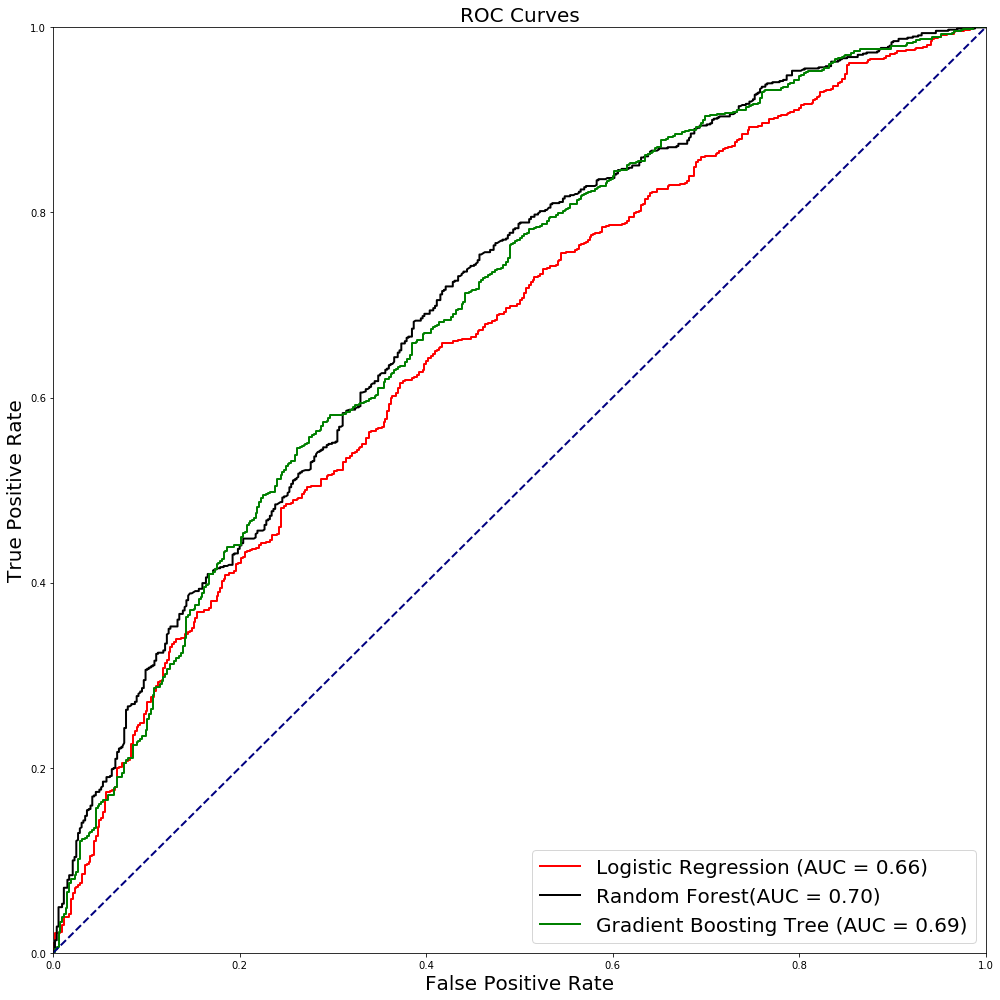

In [30]:
fig = plt.figure(figsize=(14,14))
lw = 2


plt.plot(logit_fpr, logit_tpr, color='red',
         lw=lw, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
plt.plot(rf_fpr, rf_tpr, color='black',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot(gb_fpr, gb_tpr, color='green',
         lw=lw, label='Gradient Boosting Tree (AUC = %0.2f)' % roc_auc_gb)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate',fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('ROC Curves', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.tight_layout()
# plt.savefig('roc_curves_all_ALL.png')
# plt.savefig('roc_curves_svg_all_all.svg')
plt.show()

# Build a PR curve

In [31]:
rf_percision, rf_recall, rf_thresholds = precision_recall_curve(y_test_label,rf.predict_proba(X_test_label)[:,1])
gb_percision, gb_recall, gb_thresholds = precision_recall_curve(y_test_label,gb.predict_proba(X_test_label)[:,1])
logit_percision, logit_recall, logit_thresholds = precision_recall_curve(y_test_one,logit.predict_proba(X_test_one)[:,1])


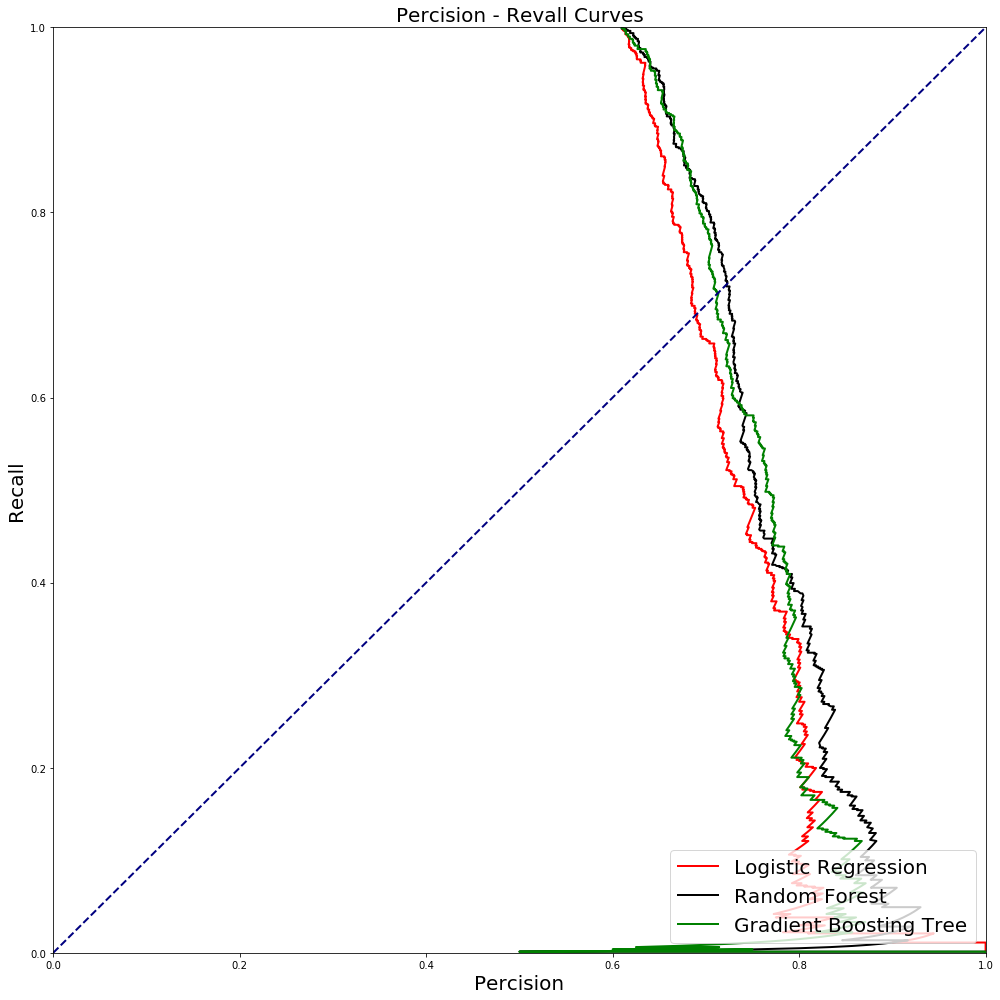

In [32]:
fig = plt.figure(figsize=(14,14))
lw = 2


plt.plot(logit_percision, logit_recall, color='red',
         lw=lw, label='Logistic Regression')
plt.plot(rf_percision, rf_recall, color='black',
         lw=lw, label='Random Forest')
plt.plot(gb_percision, gb_recall, color='green',
         lw=lw, label='Gradient Boosting Tree')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Percision',fontsize = 20)
plt.ylabel('Recall', fontsize = 20)
plt.title('Percision - Revall Curves', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.tight_layout()
# plt.savefig('roc_curves_all_ALL.png')
# plt.savefig('roc_curves_svg_all_all.svg')
plt.show()